# Cats And Dogs2 #2

- CNN 층 쌓기
    - 필터 수는 2배씩 늘리기
    - 커널 사이즈는 1씩 낮추기

- 이미지 전처리 객체 : tensorflow.keras.preprocessing.image.ImageDataGenerator

- 객체 정의 및 초기화
 
```python
image_gen = ImageDataGenerator(
    rescale=1.0 / 255,  # 정규화(색상값을 0~1사이로 변경함)
    rotation_range=30,  # 이미지 무작위 회전 (30도 이내)
    width_shift_range=0.2,  # 가로 방향 이동 범위 (무작위 20% 이내)
    height_shift_range=0.2,  # 세로 방향 이동 범위 (무작위 20% 이내)
    shear_range=0.2,  # 층 밀리기 강도 (무작위 20% 이내)
    zoom_range=0.2,  # 줌 범위 (무작위 20% 이내)
    brightness_range=[0.5, 1.0],  # 이미지 밝기
    horizontal_flip=True,  # 수평 뒤집기
    vertical_flip=True,  # 수직 뒤집기
    fill_mode="nearest",  # 이미지 변형 시 채울 픽셀
    validation_split=0.2,  # 검증 데이터 비율
)
```
- 객체를 통한 전처리

```python
image_gen.flow_from_directory(
    images,  # 이미지 파일이 위치한 폴더
    classes=list,  # 분류할 클래스명
    batch_size=16,  # 배치 사이즈
    class_mode="binary",  # 이진분류용임을 명시(binary or categorical)
    target_size=(64, 64),  # 변환될 이미지 해상도
    shuffle=True,  # 이미지 섞기
    color_mode="gray / rgb",  # 흑백 컬러 이미지
    seed=0,  # 랜덤 시드값
    subset="training / validation",  # 훈련 / 검증용 데이터 생성임을 명시
)
```

- batch_size : batch당 데이터의 개수
    - batch : 전체 데이터 개수에서 batch_size를 나눈 개수로 단일 에포크의 학습 수에서 ?/n으로 표기되는 부분
    - steps_per_epoch : 에포크가 사용할 batch의 개수

In [1]:
# 패키지 로드
import sys, os

import warnings
warnings.filterwarnings(action="ignore")

# from hossam.util import *
# from hossam.plot import *
# from hossam.tensor import *

# import sys
# if sys.platform == 'linux':
#     sys.path.append("/home/yjg1005/nas/Python/Mega_IT")    
# else:
#     sys.path.append("Y:\Python\Mega_IT")
    
# from yjk_module.preprocessing import *
# from yjk_module.ml_module import *
# from yjk_module.dl_module import *

import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageEnhance

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization, Flatten
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

2024-04-24 13:00:26.046052: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-24 13:00:26.046076: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-24 13:00:26.046717: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-24 13:00:26.050263: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-24 13:00:26.536834: W tensorflow/compiler/tf2

In [2]:
# if sys.platform == 'linux':
#     plt.rcParams["font.family"] = 'D2Coding'

In [3]:
# 압축파일의 경로
workspace_dir = "./data"
file_path = os.path.join(workspace_dir, "cats-and-dogs.zip")

# 압축을 해제할 경로
extract_dir = os.path.join(workspace_dir, "cats-and-dogs")

고양이 이미지 파일 수:  5000 개


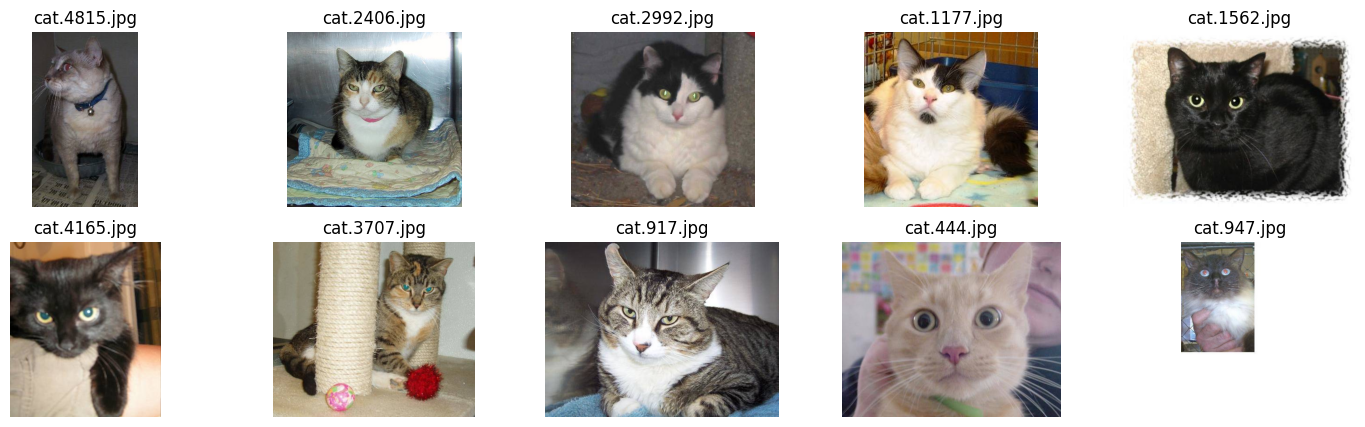

In [4]:
# 고양이 이미지 파일이 위치한 디렉토리 경로
cats_dir = os.path.join(extract_dir, "cats")
cats_file_list = os.listdir(cats_dir)

# 파일 수 확인
cats_len = len(cats_file_list)
print("고양이 이미지 파일 수: ", cats_len, "개")

rand = np.random.random_integers(0, cats_len - 1, 10)

fig, ax = plt.subplots(2, 5, figsize=(18, 5), dpi=100)

for i in range(0, len(ax)):
    for j in range(0, len(ax[i])):
        p = i * len(ax[i]) + j
        file_path = os.path.join(cats_dir, cats_file_list[rand[p]])
        img = Image.open(file_path)
        ax[i][j].imshow(img)
        ax[i][j].axis("off")
        ax[i][j].set_title(cats_file_list[rand[p]])

plt.show()
plt.close()

강아지 이미지 파일 수:  5000 개


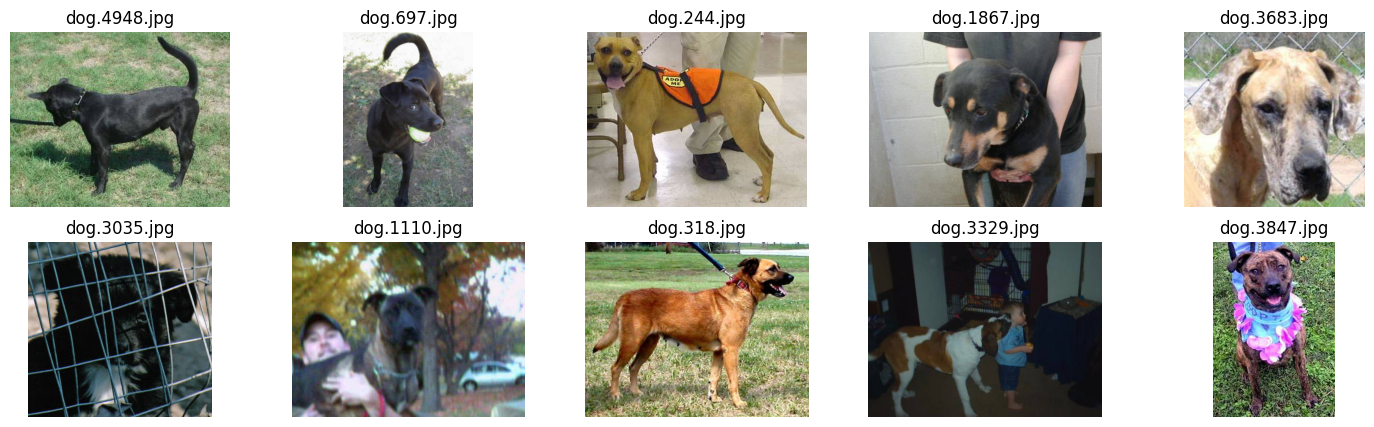

In [5]:
# 강아지 이미지 파일이 위치한 디렉토리
dogs_dir = os.path.join(extract_dir, "dogs")
dogs_file_list = os.listdir(dogs_dir)

# 파일 수 확인
dogs_len = len(dogs_file_list)
print("강아지 이미지 파일 수: ", dogs_len, "개")

rand = np.random.random_integers(0, dogs_len - 1, 10)

fig, ax = plt.subplots(2, 5, figsize=(18, 5), dpi=100)

for i in range(0, len(ax)):
    for j in range(0, len(ax[i])):
        p = i * len(ax[i]) + j
        file_path = os.path.join(dogs_dir, dogs_file_list[rand[p]])
        img = Image.open(file_path)
        ax[i][j].imshow(img)
        ax[i][j].axis("off")
        ax[i][j].set_title(dogs_file_list[rand[p]])

plt.show()
plt.close()

In [6]:
# 이미지 전처리 객체 생성
image_gen = ImageDataGenerator(
    rescale=1.0 / 255,  # 정규화(색상값을 0~1사이로 변경함)
    rotation_range=30,  # 이미지 무작위 회전 (30도 이내)
    width_shift_range=0.2,  # 가로 방향 이동 범위 (무작위 20% 이내)
    height_shift_range=0.2,  # 세로 방향 이동 범위 (무작위 20% 이내)
    shear_range=0.2,  # 층 밀리기 강도 (무작위 20% 이내)
    zoom_range=0.2,  # 줌 범위 (무작위 20% 이내)
    brightness_range=[0.5, 1.0],  # 이미지 밝기
    horizontal_flip=True,  # 수평 뒤집기
    vertical_flip=True,  # 수직 뒤집기
    fill_mode="nearest",  # 이미지 변형 시 채울 픽셀
    validation_split=0.2,  # 검증 데이터 비율
)

고양이 이미지 파일 수:  5000 개


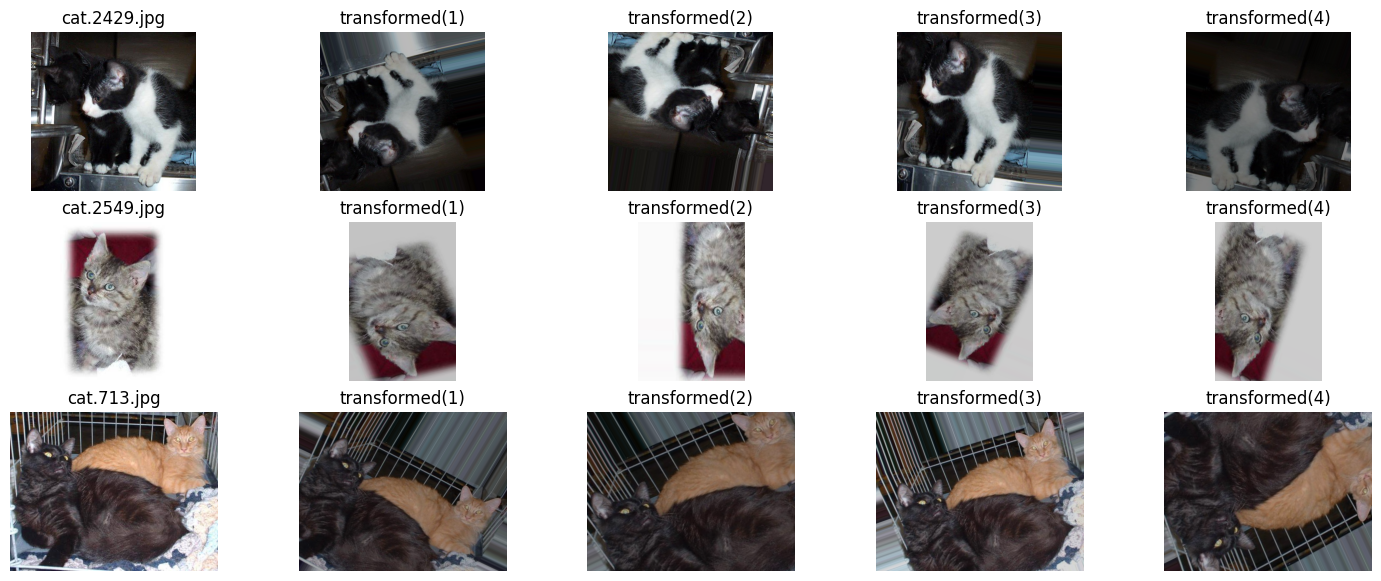

In [7]:
# 고양이 이미지 파일이 위치한 디렉토리 경로
cats_dir = os.path.join(extract_dir, "cats")
cats_file_list = os.listdir(cats_dir)

# 파일 수 확인
cats_len = len(cats_file_list)
print("고양이 이미지 파일 수: ", cats_len, "개")

rand = np.random.random_integers(0, cats_len - 1, 3)

fig, ax = plt.subplots(3, 5, figsize=(18, 7), dpi=100)

for i in range(0, len(ax)):
    target_file = cats_file_list[rand[i]]

    file_path = os.path.join(cats_dir, target_file)
    img = Image.open(file_path)

    ax[i][0].imshow(img)
    ax[i][0].axis("off")
    ax[i][0].set_title(target_file)

    # 전처리 적용
    img_flow = image_gen.flow(np.array([img]))

    for j in range(1, 5):
        # 이미지 추출
        data = next(img_flow)
        created_img = data[0]

        ax[i][j].imshow(created_img)
        ax[i][j].axis("off")
        ax[i][j].set_title(f"transformed({j})")

plt.show()
plt.close()

In [8]:
# 분류할 종속변수 확인
classes = os.listdir(extract_dir)
classes

['cats', 'dogs']

In [9]:
# 훈련용 이미지 데이터 생성
train_set = image_gen.flow_from_directory(
    extract_dir,  # 이미지 파일이 위치한 폴더
    classes=classes,  # 분류할 클래스명
    batch_size=16,  # 배치 사이즈
    class_mode="binary",  # 이진분류용임을 명시(binary or categorical)
    target_size=(64, 64),  # 변환될 이미지 해상도
    shuffle=True,  # 이미지 섞기
    color_mode="rgb",  # 컬러 이미지
    seed=0,  # 랜덤 시드값
    subset="training",  # 훈련용 데이터 생성임을 명시
)

train_set.class_indices

Found 8000 images belonging to 2 classes.


{'cats': 0, 'dogs': 1}

In [10]:
# 검증용 이미지 데이터 생성
test_set = image_gen.flow_from_directory(
    extract_dir,  # 이미지 파일이 위치한 폴더
    classes=classes,  # 분류할 클래스명
    batch_size=16,  # 배치 사이즈
    class_mode="binary",  # 이진분류용임을 명시(binary or categorical)
    target_size=(64, 64),  # 변환될 이미지 해상도
    shuffle=True,  # 이미지 섞기
    color_mode="rgb",  # 컬러 이미지
    seed=0,  # 랜덤 시드값
    subset="validation",  # 검증용 데이터 생성임을 명시
)

test_set.class_indices

Found 2000 images belonging to 2 classes.


{'cats': 0, 'dogs': 1}

In [11]:
# CNN 모델 구축
model = Sequential([
    Conv2D(16, kernel_size = (6, 6), activation = 'relu', input_shape = (64, 64, 3), padding = 'same'),
    BatchNormalization(),
    MaxPool2D((2, 2)),
    Dropout(0.1),
    Conv2D(32, kernel_size = (5, 5), activation = 'relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D((2, 2)),
    Dropout(0.1),
    Conv2D(64, kernel_size = (4, 4), activation = 'relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D((2, 2)),
    Dropout(0.1),
    Conv2D(128, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D((2, 2)),
    Dropout(0.1),
    Flatten(),
    Dense(64, activation = 'relu'),
    BatchNormalization(),
    Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        1744      
                                                                 
 batch_normalization (Batch  (None, 64, 64, 16)        64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        12832     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        1

2024-04-24 13:00:29.381087: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22433 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:08:00.0, compute capability: 8.6


In [12]:
# kh = YjkKerasHelper('c')

In [13]:
# 모델 컴파일
model.compile(optimizer = Adam(learning_rate = 0.001, epsilon = 1e-07), loss = 'binary_crossentropy', metrics = ['acc'])

In [14]:
%%time

# 모델 훈련
batch_size = 64

history = model.fit(x = train_set, validation_data = test_set, batch_size = batch_size, epochs = 1000, steps_per_epoch = train_set.samples // 16, validation_steps = test_set.samples // 16,
    callbacks = [
    EarlyStopping(patience = 10, restore_best_weights = True),
    ReduceLROnPlateau(patience = 5, min_lr = 1e-06)
])

Epoch 1/1000


2024-04-24 13:00:30.545778: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-04-24 13:00:30.722447: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-04-24 13:00:30.793227: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-24 13:00:30.961749: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-24 13:00:31.792601: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fbf0044f580 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-24 13:00:31.792622: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 30

500/500 [==============================] - 22s 38ms/step - loss: 0.7051 - acc: 0.5690 - val_loss: 0.7732 - val_acc: 0.5320 - lr: 0.0010
Epoch 2/1000
500/500 [==============================] - 19s 37ms/step - loss: 0.6645 - acc: 0.6015 - val_loss: 0.6949 - val_acc: 0.5870 - lr: 0.0010
Epoch 3/1000
500/500 [==============================] - 19s 38ms/step - loss: 0.6529 - acc: 0.6079 - val_loss: 1.0945 - val_acc: 0.5150 - lr: 0.0010
Epoch 4/1000
500/500 [==============================] - 18s 36ms/step - loss: 0.6494 - acc: 0.6173 - val_loss: 0.6910 - val_acc: 0.5720 - lr: 0.0010
Epoch 5/1000
500/500 [==============================] - 18s 36ms/step - loss: 0.6396 - acc: 0.6305 - val_loss: 0.6271 - val_acc: 0.6450 - lr: 0.0010
Epoch 6/1000
500/500 [==============================] - 19s 37ms/step - loss: 0.6336 - acc: 0.6352 - val_loss: 0.7391 - val_acc: 0.5785 - lr: 0.0010
Epoch 7/1000
500/500 [==============================] - 18s 37ms/step - loss: 0.6302 - acc: 0.6369 - val_loss: 1.0676 -

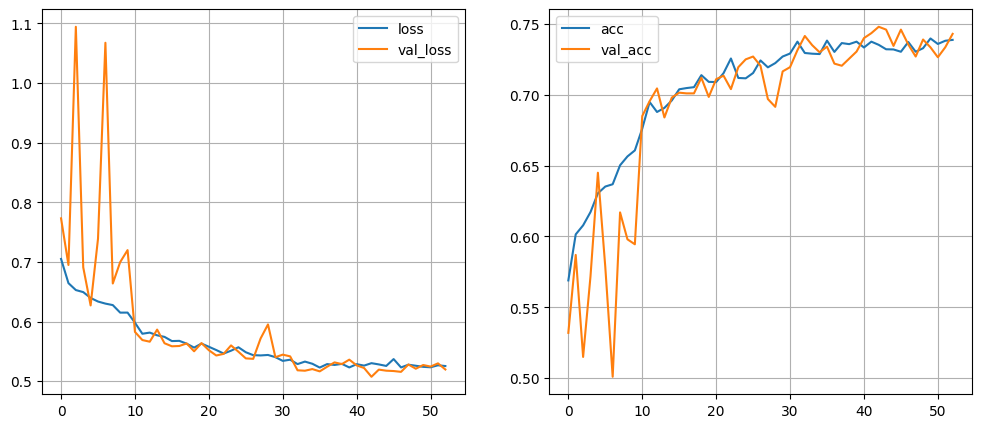

In [15]:
# yjk_dl_history_plot(history, 'acc')

# 학습곡선 확인
hist_dict = history.history

fig, ax = plt.subplots(1, 2, figsize = (12, 5))
ax[0].plot(hist_dict['loss'], label = 'loss')
ax[0].plot(hist_dict['val_loss'], label = 'val_loss')
ax[0].grid()
ax[0].legend()

ax[1].plot(hist_dict['acc'], label = 'acc')
ax[1].plot(hist_dict['val_acc'], label = 'val_acc')
ax[1].grid()
ax[1].legend()

plt.show()